# Full stack data analysis tutorial

As an emerging data scientist you could be assigned tasks that range from fixing excel file typos to enacting classification with custom reinforcement learning algorithms. Today we'll run through a good general process for learning how to "deal" with a new data set.




## Step 1: Work Environment Setup



In [11]:
%matplotlib inline

In [12]:
import numpy
import pandas


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Don't worry too much about the seed generation step, this just ensures that we can reproduce the neural network training process

In [4]:
seed = 42
numpy.random.seed(seed)

Let's download the iconic R.A. Fisher's iris database, the definitive classical dataset for classification.

In [6]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2017-06-28 10:31:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: ‘iris.data.1’

100%[======================================>] 4,551       --.-K/s   in 0s      

2017-06-28 10:31:42 (476 MB/s) - ‘iris.data.1’ saved [4551/4551]



# Step 2: Exploratory Data Analysis

At this point it is very important to take a pause and look at the raw data. The very first step of exploratory data analysis should **always** be to look at the raw data. It will let you know if you need to clean the data, how you should approach analyzing the data, and most importantly get you in the right mindset for tackling whatever task you have.

In [14]:
import csv
 
with open('iris.data') as data:
    dataReader = csv.reader(data)
    for row in dataReader:
        print(row)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1.0', '0.2', 'Ir

Immediately we can see that there are five categories to the csv file, four of which are numerical (predictive) and one categorical (the class) in nature. Due to the natural set up of the data we can immediately identify that this dataset is most likely used for classification (though we already knew that since it would be strange for the classical classification dataset to not be used for classifiation). 

An important step that is often glossed over is the reading of any associated documents or descriptions. While we could generate some classification results by labelling each column arbitrarily, we can derive a much more compelling data product by actually fully understanding the data. In this case we should find out the reason this data was collected, what the category labels are, and perhaps most importantly what an iris is.

If you look at the file we received using the ```wget``` command, you'll see that there's a folder called iris in the parent directory. By going to the URL ```http://archive.ics.uci.edu/ml/machine-learning-databases/iris/``` we can see that there is a names document that gives us all the relevant information we need and more.

In [15]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

--2017-06-28 10:50:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [text/plain]
Saving to: ‘iris.names’

100%[======================================>] 2,998       --.-K/s   in 0s      

2017-06-28 10:50:10 (93.7 MB/s) - ‘iris.names’ saved [2998/2998]



In [20]:
import csv

with open('iris.names') as data:
    for row in data:
        print(row)

1. Title: Iris Plants Database

	Updated Sept 21 by C.Blake - Added discrepency information



2. Sources:

     (a) Creator: R.A. Fisher

     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

     (c) Date: July, 1988



3. Past Usage:

   - Publications: too many to mention!!!  Here are a few.

   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"

      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions

      to Mathematical Statistics" (John Wiley, NY, 1950).

   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.

      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.

   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System

      Structure and Classification Rule for Recognition in Partially Exposed

      Environments".  IEEE Transactions on Pattern Analysis and Machine

      Intelligence, Vol. PAMI-2, No. 1, 67-71.

      -- Results:

         -- very low misclassifica

Now that we know what the raw data looks like, let's make it easier to look at by constructing a pandas dataframe. This will also allow us to extract some key information about the data later on.

In [21]:
dataframe = pandas.read_csv("iris.data", header=None)
print dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [9]:
dataframe.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
dataframe.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
dataframe.sample(5)

,0,1,2,3,4
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [10]:
print dataset.shape

(150, 5)


As confirmed by the dataset's shape, there are 150 subjects with 5 categories each.
Let's try visualizing the data with the in-built pandas visualization suite and see what happens. To save us some time let's reload the data into a separate dataframe with the associated column labels.

In [71]:
simple = pandas.read_csv("iris.data", header=None, names = ['sep_l', 'sep_w',' pet_l', 'pet_w', 'class'])

In [72]:
import matplotlib
matplotlib.style.use('ggplot')

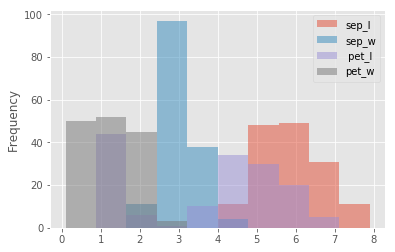

In [73]:
plt.figure
simple.plot.hist(alpha=0.5)

While interesting, this visualization givesus relatively little to chew on. Each color corresponds to one of the numerical values, so these histograms are an overall summary of the dataset irrespective of class.

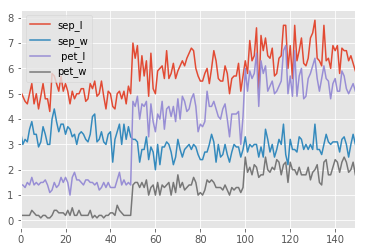

In [76]:
plt.figure
simple.plot()

Here we can derive some interesting insights. The data is partitioned into three different regions, hovering at round the (0, 50), (50, 100), and (100, 150) marks. The boundaries for each third shows a markedly discrete difference with the rest of the third. while looking at the data we discovered that there were 50 samples of each iris class. If we look at each nuermical category we can see that the range of values differ for each third. The only "problem" area seems to be septal width where the second and third thirds are rather similar. This plot shows that classification is not only a viable strategy for analysis, but also one that is likely to be highly effective. Let's see if we can derive any more pertinent clues from analyzing each class individually.

In [60]:
grouped = dataframe.groupby([4])
grouped.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [61]:
simple = pandas.read_csv("iris.data", header=None, names = ['sep_l', 'sep_w',' pet_l', 'pet_w', 'class'])

In [62]:
simple.head()

,sep_l,sep_w,pet_l,pet_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
simple_1 = simple[simple['class'] == 'Iris-setosa']
simple_2 = simple[simple['class'] == 'Iris-versicolor']
simple_3 = simple[simple['class'] == 'Iris-virginica']

In [70]:
print simple_1.info()
print simple_2.info()
print simple_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
sep_l     50 non-null float64
sep_w     50 non-null float64
 pet_l    50 non-null float64
pet_w     50 non-null float64
class     50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 5 columns):
sep_l     50 non-null float64
sep_w     50 non-null float64
 pet_l    50 non-null float64
pet_w     50 non-null float64
class     50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 100 to 149
Data columns (total 5 columns):
sep_l     50 non-null float64
sep_w     50 non-null float64
 pet_l    50 non-null float64
pet_w     50 non-null float64
class     50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB
None


As the data document states, each class should have 50 members so our brief sanity check allows us to confirm the split function has not failed in an obvious manner.

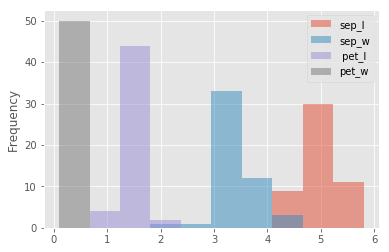

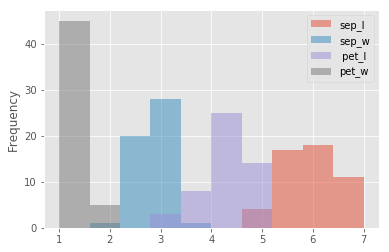

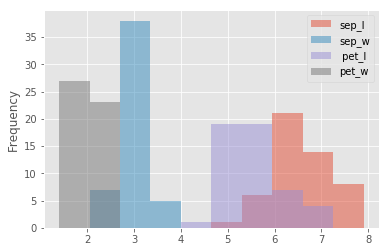

In [81]:
simple_1.plot.hist(alpha=0.5)
simple_2.plot.hist(alpha=0.5)
simple_3.plot.hist(alpha=0.5)

In [82]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

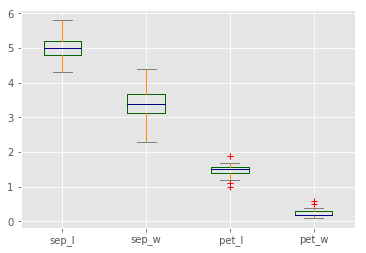

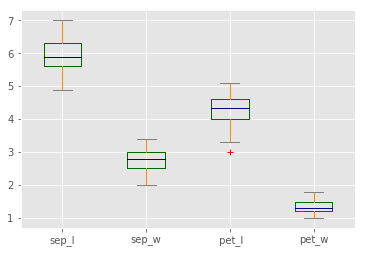

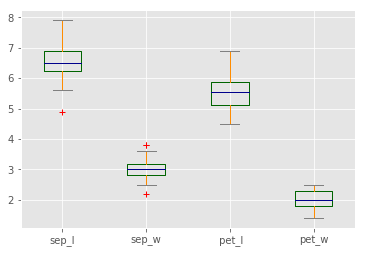

In [83]:
simple_1.plot(kind = 'box', color = color, sym = 'r+')
simple_2.plot(kind = 'box', color = color, sym = 'r+')
simple_3.plot(kind = 'box', color = color, sym = 'r+')

In [ ]:
names = ['sep_l', 'sep_w',' pet_l', 'pet_w', 'class']

KeyError: 'class'

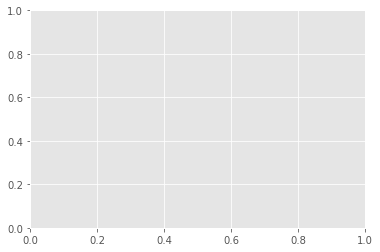

In [112]:
simple.plot(kind='scatter', x='sep_w', y='class')

In [90]:
simple.sample(5)

,sep_l,sep_w,pet_l,pet_w,class
84,5.4,3.0,4.5,1.5,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica


In [102]:
from numpy.random import rand

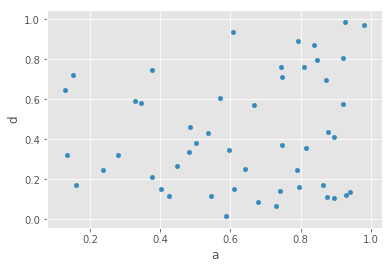

In [104]:
df = pandas.DataFrame(rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='d');

In [ ]:
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]